<h1 style="color:darkorange;font-size:44px;font-weight:600">Ecommerce Product Categorization</h1>
<img src="https://static.startuptalky.com/2022/08/top-products-and-catagories-startuptalky.jpg">

 <div style="background-color:#f5deb3; padding:12px;border-radius:12px">
<h3>🎯 Objective</h3>
    <p>
        The primary objective of this project is to develop an advanced multi-class text classifier capable of accurately categorizing a wide range of eCommerce products based on their descriptions. By leveraging modern machine learning techniques, including TF-IDF Vectorization, hyperparameter tuning, we aim to achieve the following:
    </p>
    <ul>
        <li><strong>Efficiency:</strong> Ensure that the classifier processes product descriptions quickly, facilitating real-time categorization in an eCommerce environment.</li>
        <li><strong>Accuracy:</strong> Maximize the accuracy of product categorization to reduce search friction and improve customer experience.</li>
        <li><strong>Scalability:</strong> Design the solution to handle large volumes of diverse product data, including products with ambiguous names or descriptions.</li>
        <li><strong>Robustness:</strong> Create a classifier that can manage and accurately categorize products in multiple languages and with unconventional naming conventions.</li>
    </ul>
    <p>
        By meeting these objectives, the project will contribute to more efficient and accurate product categorization in the eCommerce industry, enhancing overall user experience and operational efficiency.
    </p>
</div>

<a id="contents_tabel"></a>

## 📚 Table of Content
<br>

<span style="font-size: 1.2em;line-height:1.3em">
    
    
- **[1 | Import Libraries](#l)** 📦
- **[2 | Dataset Preparation](#2)** 🗂️
- **[3 | EDA](#3)** 📊
- **[4 | Text Normalization](#4)** ✨
    - **[4.1 | Converting to Lowercase](#4.1)** 🔡
    - **[4.2 | Removal of Whitespaces](#4.2)** 🧹
    - **[4.3 | Removal of Punctuations](#4.3)** ❌
    - **[4.4 | Removal of Unicode Characters](#4.4)** 🌐
    - **[4.5 | Removal of Stop Words](#4.5)** 🚫
    - **[4.6 | Spelling Correction](#4.6)** 📝
    - **[4.7 | Stemming and Lemmatization](#4.7)** 🌱
    - **[4.8 | Discardment of Non-alphabetic Words](#4.8)** 🔤
    - **[4.9 | Retainment of Relevant Parts of Speech](#4.9)** 🗣️
    - **[4.10 | Workflow Integration](#4.10)** 🔄
- **[5 | Train Validation Split](#5)** 🎓
    - **[5.1 | Test Data Setup](#5.1)** 🧪
- **[6 | TF-IDF Vectorization](#6)** 📈
    - **[6.1 | TF-IDF Model](#6.1)** 🧠
    - **[6.2 | TF-IDF Baseline Modeling](#6.2)** 🏗️
    - **[6.3 | TF-IDF Hyperparameter Tuning](#6.3)** 🔧  
    - **[6.4 | Evaluation](#6.4)** 🧐
    - **[6.5 | Accuracy Prediction on Test Result Data](#6.5)** 📊
- **[7 | Conclusion](#7)** 🎯


<a id="1"></a>
# <p style="background-color:black; font-family:calibri; font-size:130%; color:white; text-align:center; border-radius:15px 50px; padding:10px">1 | Import Libraries</p>

⬆️ [Tabel of Contents](#contents_tabel)

In [1]:
import re
import string
import numpy as np 
import random
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from plotly import graph_objs as go
import plotly.express as px
import plotly.figure_factory as ff
from collections import Counter

from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)

import warnings
warnings.filterwarnings('ignore')


from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

from sklearn.model_selection import train_test_split

import string, re, nltk
from string import punctuation
from nltk.tokenize import word_tokenize, RegexpTokenizer
from nltk.corpus import stopwords
# !pip install num2words
from num2words import num2words
# !pip install pyspellchecker
from spellchecker import SpellChecker
from nltk.stem.porter import PorterStemmer
import spacy
from nltk.stem import WordNetLemmatizer

<a id="2"></a>
# <p style="background-color:black; font-family:calibri; font-size:130%; color:white; text-align:center; border-radius:15px 50px; padding:10px">2 | Dataset Preparation</p>

⬆️ [Tabel of Contents](#contents_tabel)

In [2]:
train_df = pd.read_csv("Datasets/train_product_data.csv")

In [3]:
train_df.head()

,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications
0,c2d766ca982eca8304150849735ffef9,2016-03-25 22:59:23 +0000,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,Clothing,SRTEH2FF9KEDEFGF,999.0,379.0,"[""http://img5a.flixcart.com/image/short/u/4/a/...",False,Key Features of Alisha Solid Women's Cycling S...,No rating available,No rating available,Alisha,"{""product_specification""=>[{""key""=>""Number of ..."
1,f449ec65dcbc041b6ae5e6a32717d01b,2016-03-25 22:59:23 +0000,http://www.flipkart.com/aw-bellies/p/itmeh4grg...,AW Bellies,Footwear,SHOEH4GRSUBJGZXE,999.0,499.0,"[""http://img5a.flixcart.com/image/shoe/7/z/z/r...",False,Key Features of AW Bellies Sandals Wedges Heel...,No rating available,No rating available,AW,"{""product_specification""=>[{""key""=>""Ideal For""..."
2,0973b37acd0c664e3de26e97e5571454,2016-03-25 22:59:23 +0000,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,Clothing,SRTEH2F6HUZMQ6SJ,699.0,267.0,"[""http://img5a.flixcart.com/image/short/6/2/h/...",False,Key Features of Alisha Solid Women's Cycling S...,No rating available,No rating available,Alisha,"{""product_specification""=>[{""key""=>""Number of ..."
3,ce5a6818f7707e2cb61fdcdbba61f5ad,2016-03-25 22:59:23 +0000,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,Clothing,SRTEH2FVVKRBAXHB,1199.0,479.0,"[""http://img6a.flixcart.com/image/short/p/j/z/...",False,Key Features of Alisha Solid Women's Cycling S...,No rating available,No rating available,Alisha,"{""product_specification""=>[{""key""=>""Number of ..."
4,29c8d290caa451f97b1c32df64477a2c,2016-03-25 22:59:23 +0000,http://www.flipkart.com/dilli-bazaaar-bellies-...,"dilli bazaaar Bellies, Corporate Casuals, Casuals",Footwear,SHOEH3DZBFR88SCK,699.0,349.0,"[""http://img6a.flixcart.com/image/shoe/b/p/n/p...",False,"Key Features of dilli bazaaar Bellies, Corpora...",No rating available,No rating available,dilli bazaaar,"{""product_specification""=>[{""key""=>""Occasion"",..."


In [4]:
train_df.isnull().sum()

uniq_id                       0
crawl_timestamp               0
product_url                   0
product_name                  0
product_category_tree         0
pid                           0
retail_price                 57
discounted_price             57
image                         3
is_FK_Advantage_product       0
description                   1
product_rating                0
overall_rating                0
brand                      4710
product_specifications        6
dtype: int64

In [5]:
train_df = train_df[['description','product_category_tree']]

In [6]:
train_df.head()

,description,product_category_tree
0,Key Features of Alisha Solid Women's Cycling S...,Clothing
1,Key Features of AW Bellies Sandals Wedges Heel...,Footwear
2,Key Features of Alisha Solid Women's Cycling S...,Clothing
3,Key Features of Alisha Solid Women's Cycling S...,Clothing
4,"Key Features of dilli bazaaar Bellies, Corpora...",Footwear


In [7]:
train_df['description'].iloc[0]

"Key Features of Alisha Solid Women's Cycling Shorts Cotton Lycra Navy, Red, Navy,Specifications of Alisha Solid Women's Cycling Shorts Shorts Details Number of Contents in Sales Package Pack of 3 Fabric Cotton Lycra Type Cycling Shorts General Details Pattern Solid Ideal For Women's Fabric Care Gentle Machine Wash in Lukewarm Water, Do Not Bleach Additional Details Style Code ALTHT_3P_21 In the Box 3 shorts"

In [8]:
train_df.isnull().sum()

description              1
product_category_tree    0
dtype: int64

In [9]:
train_df.duplicated().sum()

1832

In [10]:
train_df.dropna(inplace = True) # Dropping observations with missing values
train_df.drop_duplicates(inplace = True) # Dropping duplicate observations
train_df.reset_index(drop = True, inplace = True) # Resetting index

In [11]:
train_df.isnull().sum()

description              0
product_category_tree    0
dtype: int64

In [12]:
train_df.duplicated().sum()

0

In [13]:
train_df.to_csv('product_clean_description.csv')

In [14]:
train_df['product_category_tree'].unique()

array(['Clothing ', 'Footwear ', 'Pens & Stationery ',
       'Bags, Wallets & Belts ', 'Home Decor & Festive Needs ',
       'Automotive ', 'Tools & Hardware ', 'Baby Care ',
       'Mobiles & Accessories ', 'Watches ', 'Toys & School Supplies ',
       'Jewellery ', 'Kitchen & Dining ', 'Computers '], dtype=object)

In [15]:
train_df['product_category_tree'].nunique()

14

In [16]:
category_mapping = {
    'Clothing ': 0,
    'Footwear ': 1,
    'Pens & Stationery ': 2,
    'Bags, Wallets & Belts ': 3,
    'Home Decor & Festive Needs ': 4,
    'Automotive ': 5,
    'Tools & Hardware ': 6,
    'Baby Care ': 7,
    'Mobiles & Accessories ': 8,
    'Watches ': 9,
    'Toys & School Supplies ': 10,
    'Jewellery ': 11,
    'Kitchen & Dining ': 12,
    'Computers ': 13
}


In [17]:
train_df['product_category_encoded'] = train_df['product_category_tree'].map(category_mapping)

<a id="3"></a>
# <p style="background-color:black; font-family:calibri; font-size:130%; color:white; text-align:center; border-radius:15px 50px; padding:10px">3 | EDA</p>

⬆️ [Tabel of Contents](#contents_tabel)

In [18]:
train_df['description_len'] = train_df['description'].apply(lambda x: len(x.split(' ')))
train_df.head()

,description,product_category_tree,product_category_encoded,description_len
0,Key Features of Alisha Solid Women's Cycling S...,Clothing,0,64
1,Key Features of AW Bellies Sandals Wedges Heel...,Footwear,1,107
2,Key Features of Alisha Solid Women's Cycling S...,Clothing,0,63
3,Key Features of Alisha Solid Women's Cycling S...,Clothing,0,65
4,"Key Features of dilli bazaaar Bellies, Corpora...",Footwear,1,64


description lengths across categories

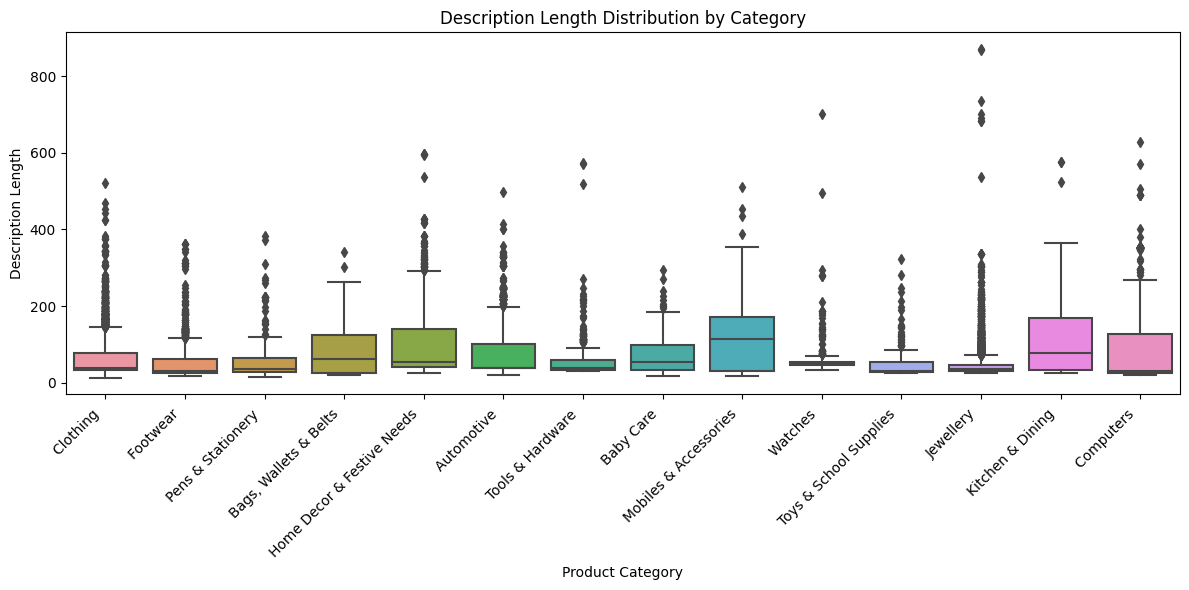

In [19]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='product_category_tree', y='description_len', data=train_df)
plt.title('Description Length Distribution by Category')
plt.xlabel('Product Category')
plt.ylabel('Description Length')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

 <div style="background-color:#f5deb3; padding:12px;border-radius:12px"><p>Descriptions for products in the "<b>Mobiles & Accessories</b>" category tend to be the longest, followed by "<b>Kitchens & Dining</b>" and "<b>Computers</b>."
    Descriptions for products in the "<b>Clothing</b>" ,"<b>watches</b>" and "<b>Footwear</b>" categories tend to be on the shorter side.</p>


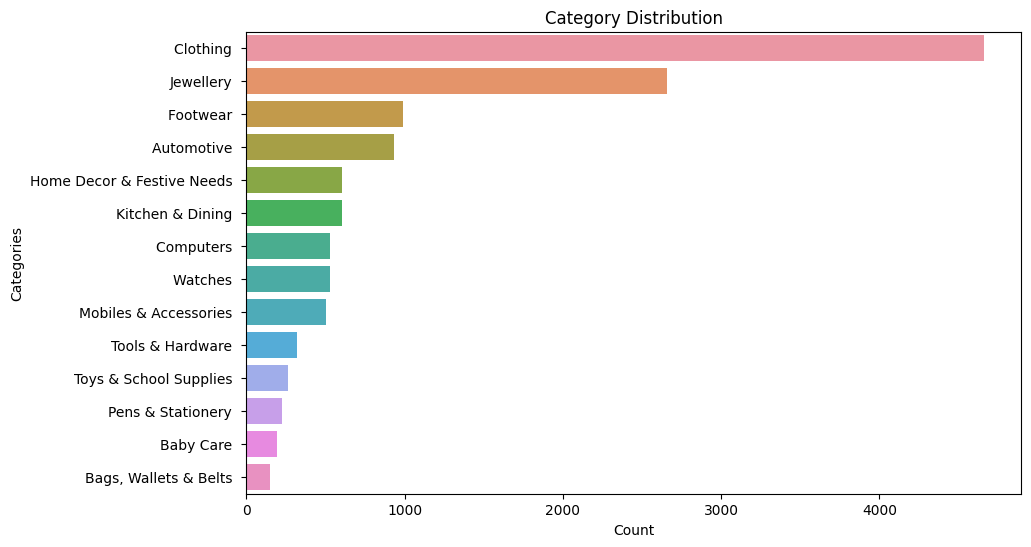

In [20]:
plt.figure(figsize=(10, 6))
sns.countplot(y="product_category_tree", data=train_df, order=train_df['product_category_tree'].value_counts().index)
plt.title('Category Distribution')
plt.xlabel('Count')
plt.ylabel('Categories')
plt.show()


 <div style="background-color:#f5deb3; padding:12px;border-radius:12px">
    <p>Dataset contains more categories of “Clothing” followed by "<b>Jewellery</b>" and "<b>Footwear</b>", this implies that customers are more interested in buying this products probably female customers</p>


<a id="4"></a>
# <p style="background-color:black; font-family:calibri; font-size:130%; color:white; text-align:center; border-radius:15px 50px; padding:10px">4 | Text Normalization</p>

⬆️ [Tabel of Contents](#contents_tabel)

In [21]:
# RegexpTokenizer
regexp = RegexpTokenizer("[\w']+")

<a id="4.1"></a>
# <b><span style='color:#333'>4.1 |</span><span style='color:darkorange'> Converting to Lowercase</span></b>

In [22]:
# Converting to lowercase
def convert_to_lowercase(text):
    return text.lower()

text = "This is a HACKATHON oN Nlp Problem STAtement"
print("Input: {}".format(text))
print("Output: {}".format(convert_to_lowercase(text)))

Input: This is a HACKATHON oN Nlp Problem STAtement
Output: this is a hackathon on nlp problem statement


<a id="4.2"></a>
# <b><span style='color:#333'>4.2 |</span><span style='color:darkorange'> Removal of Whitespaces</span></b>

In [23]:
# Removing whitespaces
def remove_whitespace(text):
    return text.strip()

text = " \t This is a string \t "
print("Input: {}".format(text))
print("Output: {}".format(remove_whitespace(text)))

Input:  	 This is a string 	 
Output: This is a string


<a id="4.3"></a>
# <b><span style='color:#333'>4.3 |</span><span style='color:darkorange'> Removal of Punctuations</span></b>

In [24]:
# Removing punctuations
def remove_punctuation(text):
    punct_str = string.punctuation
    punct_str = punct_str.replace("'", "") # discarding apostrophe from the string to keep the contractions intact
    return text.translate(str.maketrans("", "", punct_str))

text = "Here's [an] example? {of} &a string. with.? (punctuations)!!!!"
print("Input: {}".format(text))
print("Output: {}".format(remove_punctuation(text)))

Input: Here's [an] example? {of} &a string. with.? (punctuations)!!!!
Output: Here's an example of a string with punctuations


<a id="4.4"></a>
# <b><span style='color:#333'>4.4 |</span><span style='color:darkorange'> Removal of Unicode Characters</span></b>

In [25]:
# Removing HTML tags
def remove_html(text):
    html = re.compile(r'<.*?>')
    return html.sub(r'', text)

text = '<a href = "https://www.xyz.com/abc/qwert"> Ecommerce Product Categorization</a>'
print("Input: {}".format(text))
print("Output: {}".format(remove_html(text)))

Input: <a href = "https://www.xyz.com/abc/qwert"> Ecommerce Product Categorization</a>
Output:  Ecommerce Product Categorization


In [26]:
# Removing emojis
def remove_emoji(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags = re.UNICODE)
    return emoji_pattern.sub(r'', text)

text = "This innovative hd printing technique results in durable and spectacular looking prints 😊"
print("Input: {}".format(text))
print("Output: {}".format(remove_emoji(text)))

Input: This innovative hd printing technique results in durable and spectacular looking prints 😊
Output: This innovative hd printing technique results in durable and spectacular looking prints 


In [27]:
# Removing other unicode characters
def remove_http(text):
    http = "https?://\S+|www\.\S+" # matching strings beginning with http (but not just "http")
    pattern = r"({})".format(http) # creating pattern
    return re.sub(pattern, "", text)

text = "It's a function that removes links starting with http: or https such as https://en.wikipedia.org/wiki/Unicode_symbols"
print("Input: {}".format(text))
print("Output: {}".format(remove_http(text)))

Input: It's a function that removes links starting with http: or https such as https://en.wikipedia.org/wiki/Unicode_symbols
Output: It's a function that removes links starting with http: or https such as 


<a id="4.5"></a>
# <b><span style='color:#333'>4.5 |</span><span style='color:darkorange'> Removal of Stop Words</span></b>

In [28]:
# Stopwords
stops = stopwords.words("english") # stopwords

# Common words in English
alphabets = ["a", "b", "c", "d", "e", "f", "g", "h", "i", "j", "k", "l", "m", 
             "n", "o", "p", "q", "r", "s", "t", "u", "v", "w", "x", "y", "z"]

# Prepositions
prepositions = ["about", "above", "across", "after", "against", "among", 
                "around", "at", "before", "behind", "below", "beside", "between",
                "by", "down", "during", "for", "from", "in", "inside", "into", "near", 
                "of", "off", "on", "out", "over", "through", "to", "toward", "under",
                "up", "with"]

# Less common prepositions
prepositions_less_common = ["aboard", "along", "amid", "as", "beneath", "beyond", "but",
                            "concerning", "considering", "despite", "except", "following",
                            "like", "minus", "onto", "outside", "per", "plus", "regarding", 
                            "round", "since", "than", "till", "underneath", "unlike", 
                            "until", "upon", "versus", "via", "within", "without"]

# Coordinating conjunctions
coordinating_conjunctions = ["and", "but", "for", "nor", "or", "so", "and", "yet"]

# Correlative conjunctions
correlative_conjunctions = ["both", "and", "either", "or", "neither", "nor", "not",
                            "only", "but", "whether", "or"]

# Subordinating conjunctions
subordinating_conjunctions = ["after", "although", "as", "as if", "as long as", "as much as",
                              "as soon as", "as though", "because", "before", "by the time",
                              "even if", "even though", "if", "in order that", "in case", 
                              "in the event that", "lest", "now that", "once", "only", "only if",
                              "provided that", "since", "so", "supposing", "that", "than", 
                              "though", "till", "unless", "until", "when", "whenever", "where", 
                              "whereas", "wherever", "whether or not", "while"]

# Other words
others = ["ã", "å", "ì", "û", "ûªm", "ûó", "ûò", "ìñ", "ûªre", "ûªve", "ûª", 
          "ûªs", "ûówe"]

# Additional stopwords
addstops = ["among","get", "onto", "shall", "thrice", "thus", "twice", "unto", "us", 
            "would"]

# Common words in ecommerce contexts
common_ecommerce_words = ["shop", "shops", "shopping","buy","genuine","product",
                          "store", "stores", "day","replacement","good","description",
                           "purchase", "purchases", "checkout", "cart", "details","detail",
                           "discount", "discounts", "offer", "offers", "specification",
                           "deal", "deals", "sale", "sales", "item","items",
                           "voucher", "vouchers", "coupon", "coupons", 
                           "promo", "promos", "promotion", "promotions", 
                           "buying", "selling", "seller", "sellers", 
                           "buyer", "buyers", "payment", "payments", 
                           "checkout","free", "order", "orders","available", 
                           "return", "returns", "exchange", "exchanges", 
                           "refund", "refunds", "customer", "customers", 
                           "service", "services", "support", "feedback", 
                           "review", "reviews", "rating", "ratings", 
                           "online", "offline", "delivery", "shipping", 
                           "shipped", "ship", "track", "tracking","cash", 
                           "payment", "prices","price","rs.","rs","select","selected",
                           "transaction", "transactions", "secure", "key","feature","features",
                           "guarantee", "guaranteed", "fast", "quick", 
                           "easy", "convenient", "reliable", "trustworthy", 
                           "safe", "secure", "doorstep", "discounted", 
                           "affordable", "cheap", "low", "high", "best", 
                           "popular", "top", "quality", "brand", "brands", 
                            "stock","new", "latest", "trending", "hot", "exclusive"]

# since it is product categorization, platforms names won't help
ecommerce_platforms = ["flipkart", "amazon", "mintra","snapdeal"]
                           

allstops = stops + alphabets + prepositions + prepositions_less_common + coordinating_conjunctions + correlative_conjunctions + subordinating_conjunctions + others + addstops + common_ecommerce_words + ecommerce_platforms

print(allstops)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [29]:
# Function to remove stopwords from a list of texts
def remove_stopwords(text):
    return " ".join([word for word in regexp.tokenize(text) if word not in allstops])

text = "shop the latest collection of premium quality fashion accessories. get discounts on selected items. free shipping on orders over rs.50. limited stock available."
print("Input: {}".format(text))
print("Output: {}".format(remove_stopwords(text)))

Input: shop the latest collection of premium quality fashion accessories. get discounts on selected items. free shipping on orders over rs.50. limited stock available.
Output: collection premium fashion accessories 50 limited


<a id="4.6"></a>
# <b><span style='color:#333'>4.6 |</span><span style='color:darkorange'> Spelling Correction</span></b>

In [30]:
# pyspellchecker
spell = SpellChecker()

def pyspellchecker(text):
    word_list = regexp.tokenize(text)
    word_list_corrected = []
    for word in word_list:
        if word in spell.unknown(word_list):
            word_corrected = spell.correction(word)
            if word_corrected == None:
                word_list_corrected.append(word)
            else:
                word_list_corrected.append(word_corrected)
        else:
            word_list_corrected.append(word)
    text_corrected = " ".join(word_list_corrected)
    return text_corrected

text = "womon watch for limitad offar"
print("Input: {}".format(text))
print("Output: {}".format(pyspellchecker(text)))

Input: womon watch for limitad offar
Output: woman watch for limited offer


<a id="4.7"></a>
# <b><span style='color:#333'>4.7 |</span><span style='color:darkorange'> Stemming and Lemmatization</span></b>

In [31]:
# Stemming
stemmer = PorterStemmer()
def text_stemmer(text):
    text_stem = " ".join([stemmer.stem(word) for word in regexp.tokenize(text)])
    return text_stem

text = "Introducing lemmatization as an improvement over stemming"
print("Input: {}".format(text))
print("Output: {}".format(text_stemmer(text)))

Input: Introducing lemmatization as an improvement over stemming
Output: introduc lemmat as an improv over stem


In [32]:
# Lemmatization
spacy_lemmatizer = spacy.load("en_core_web_sm", disable = ['parser', 'ner'])
#lemmatizer = WordNetLemmatizer()

def text_lemmatizer(text):
    text_spacy = " ".join([token.lemma_ for token in spacy_lemmatizer(text)])
    #text_wordnet = " ".join([lemmatizer.lemmatize(word) for word in word_tokenize(text)]) # regexp.tokenize(text)
    return text_spacy
    #return text_wordnet

text = "Introducing lemmatization as an improvement over stemming"
print("Input: {}".format(text))
print("Output: {}".format(text_lemmatizer(text)))

Input: Introducing lemmatization as an improvement over stemming
Output: introduce lemmatization as an improvement over stem


<a id="4.8"></a>
# <b><span style='color:#333'>4.8 |</span><span style='color:darkorange'> Discardment of Non-alphabetic Words</span></b>

In [33]:
# Discardment of non-alphabetic words
def discard_non_alpha(text):
    word_list_non_alpha = [word for word in regexp.tokenize(text) if word.isalpha()]
    text_non_alpha = " ".join(word_list_non_alpha)
    return text_non_alpha

text = "It is a watch of Rs.1000"
print("Input: {}".format(text))
print("Output: {}".format(discard_non_alpha(text)))

Input: It is a watch of Rs.1000
Output: It is a watch of Rs


<a id="4.9"></a>
# <b><span style='color:#333'>4.9 |</span><span style='color:darkorange'> Retainment of Relevant Parts of Speech</span></b>

Ref: https://www.ling.upenn.edu/courses/Fall_2003/ling001/penn_treebank_pos.html

In [34]:
def keep_pos(text):
    # Tokenize the text
    tokens = regexp.tokenize(text)
    
    # Tag the tokens with POS tags
    tokens_tagged = nltk.pos_tag(tokens)
    
    # Define the POS tags to keep
    keep_tags = ['NN', 'NNS', 'NNP', 'NNPS',   # Nouns
                 'JJ', 'JJR', 'JJS',          # Adjectives
                 'RB', 'RBR', 'RBS',          # Adverbs
                 'VB', 'VBD', 'VBG', 'VBN',   # Verbs
                 'FW']                        # Foreign words
    
    # Keep words with specified POS tags
    keep_words = [x[0] for x in tokens_tagged if x[1] in keep_tags]
    
    # Join the kept words into a string
    return " ".join(keep_words)

In [35]:
# Example product description
product_description = "This stylish red dress is perfect for parties and special occasions. Made with high-quality fabric, it features a flattering fit and flare silhouette. Pair it with heels and statement jewelry for a stunning look."

# Apply the keep_pos function to the product description
filtered_description = keep_pos(product_description)

print("Input: {}".format(product_description))
print("Output: {}".format(filtered_description))


Input: This stylish red dress is perfect for parties and special occasions. Made with high-quality fabric, it features a flattering fit and flare silhouette. Pair it with heels and statement jewelry for a stunning look.
Output: stylish red dress perfect parties special occasions Made high quality flattering fit flare silhouette Pair heels statement jewelry stunning look


<a id="4.10"></a>
# <b><span style='color:#333'>4.10 |</span><span style='color:darkorange'> Workflow Integration</span></b>

 <div style="background-color:#f5deb3; padding:12px;border-radius:12px">
  The spelling correction step is currently commented out because it requires a significant amount of time to execute on large datasets.

In [36]:
def text_normalizer(text):
    text = convert_to_lowercase(text)
    text = remove_whitespace(text)
    text = re.sub('\n' , '', text) # converting text to one line
    text = re.sub(r'\.com\b', '', text) # Remove ".com"
    text = re.sub('\[.*?\]', '', text) # removing square brackets
    text = remove_http(text)
    text = remove_punctuation(text)
    text = remove_html(text)
    text = remove_emoji(text)
#     text = pyspellchecker(text)
    text = text_lemmatizer(text) # text = text_stemmer(text)
    text = discard_non_alpha(text)
    text = keep_pos(text)
    text = remove_stopwords(text)
    return text


In [37]:
text = " We'll (combine) women's [all] {functions}  into 1 - /SINGLE FUNCTION 🙂 & apply on watch T-shirt plastic pan @product #descriptions https://en.wikipedia.org/wiki/Text_normalization free offer on flip-kart.com Rs 100"
print("Input: {}".format(text))
print("Output: {}".format(text_normalizer(text)))

Input:  We'll (combine) women's [all] {functions}  into 1 - /SINGLE FUNCTION 🙂 & apply on watch T-shirt plastic pan @product #descriptions https://en.wikipedia.org/wiki/Text_normalization free offer on flip-kart.com Rs 100
Output: combine woman function single function apply watch tshirt plastic pan


 <div style="background-color:#f5deb3; padding:12px;border-radius:12px">
    Let's apply on the data

In [38]:
train_df['normalized_description'] = train_df['description'].apply(text_normalizer)

In [39]:
train_df[['description','normalized_description']]

,description,normalized_description
0,Key Features of Alisha Solid Women's Cycling S...,alisha solid woman cycling short cotton navy r...
1,Key Features of AW Bellies Sandals Wedges Heel...,aw belly sandal wedge heel casualsaw belly mat...
2,Key Features of Alisha Solid Women's Cycling S...,alisha solid woman cycling short cotton black ...
3,Key Features of Alisha Solid Women's Cycling S...,alisha solid woman cycling short cotton navy r...
4,"Key Features of dilli bazaaar Bellies, Corpora...",dilli bazaaar belly corporate casual casual ma...
...,...,...
13161,Thelostpuppy Book Cover for Apple iPad Air 2 (...,thelostpuppy book cover apple ipad air multico...
13162,Babes Brass Cuff (Pack of 2)\n ...,babes cuff pack babe present special combo gif...
13163,Kenway Retail Brass Copper Cuff\n ...,kenway retail brass copper cuff sultry swagger...
13164,Kenway Retail Brass Copper Cuff\n ...,kenway retail brass copper cuff swagger sexy s...


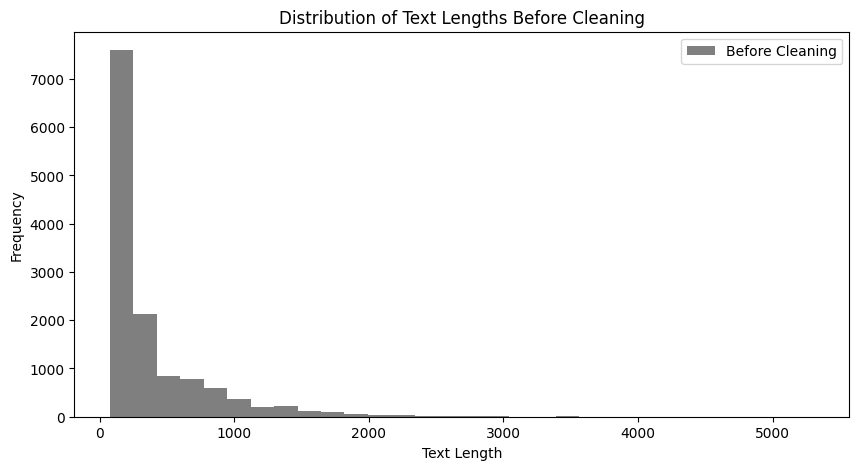

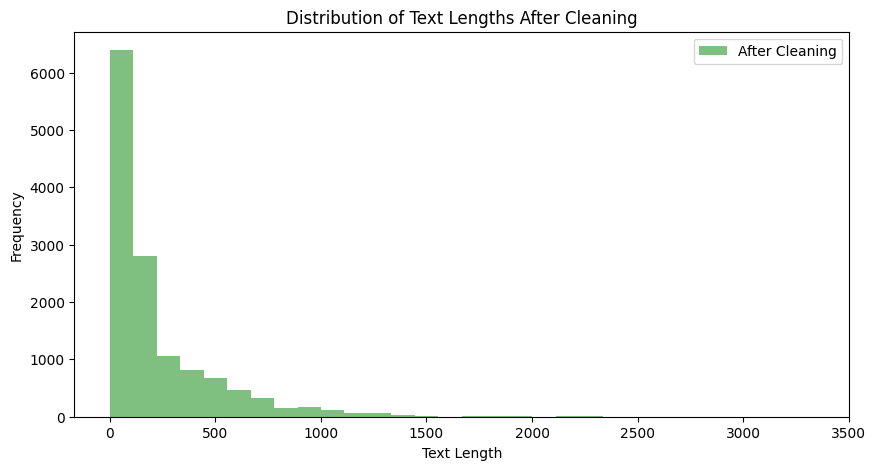

In [40]:
# Before cleaning
plt.figure(figsize=(10, 5))
plt.hist(train_df['description'].str.len(), bins=30, color='black', alpha=0.5, label='Before Cleaning')
plt.xlabel('Text Length')
plt.ylabel('Frequency')
plt.title('Distribution of Text Lengths Before Cleaning')
plt.legend()
plt.show()

# After cleaning
plt.figure(figsize=(10, 5))
plt.hist(train_df['normalized_description'].str.len(), bins=30, color='green', alpha=0.5, label='After Cleaning')
plt.xlabel('Text Length')
plt.ylabel('Frequency')
plt.title('Distribution of Text Lengths After Cleaning')
plt.legend()
plt.show()

In [41]:
# Calculating average text lengths before and after cleaning
avg_text_length_before = train_df['description'].str.len().mean()
avg_text_length_after = train_df['normalized_description'].str.len().mean()

# Calculating the percentage reduction in text length
percentage_reduction = ((avg_text_length_before - avg_text_length_after) / avg_text_length_before) * 100

print("Percentage reduction in text length after cleaning: {:.2f}%".format(percentage_reduction))


Percentage reduction in text length after cleaning: 44.75%


 <div style="background-color:#f5deb3; padding:12px;border-radius:12px">
    <p>The cleaning process applied to the text data has resulted in a significant reduction in text length, with an average reduction of approximately <b>44.75%</b>. This reduction indicates that the cleaning techniques effectively removed extraneous content, noise, punctuation, stopwords, and other irrelevant information from the text data.</p>
    </div>

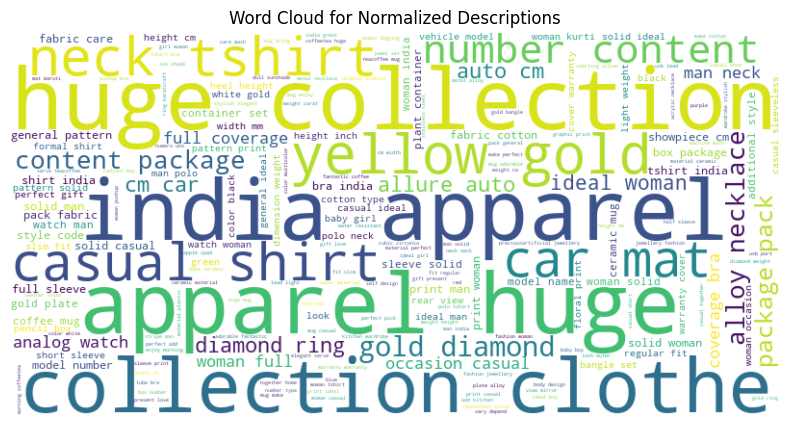

In [42]:
text = " ".join(description for description in train_df['normalized_description'])

# Create the word cloud object
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Turn off the axis
plt.title('Word Cloud for Normalized Descriptions')
plt.show()

<a id="5"></a>
# <p style="background-color:black; font-family:calibri; font-size:130%; color:white; text-align:center; border-radius:15px 50px; padding:10px">5 | Train Validation Split</p>

⬆️ [Tabel of Contents](#contents_tabel)

In [43]:
X = train_df['normalized_description']
y = train_df['product_category_encoded']

# Train-test split 
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)
print("Training data: " ,len(X_train), len(y_train))
print("Validation data: ",len(X_val), len(y_val))

Training data:  10532 10532
Validation data:  2634 2634


<a id="5.1"></a>
   # <b><span style='color:#333'>5.1 |</span><span style='color:darkorange'> Test-data Setup</span></b>

In [44]:
test_df = pd.read_csv("Datasets/test_data.csv")

In [45]:
print("Testing data without label: ",test_df.shape)

Testing data without label:  (2534, 14)


In [46]:
X_test = test_df['description'].apply(text_normalizer)

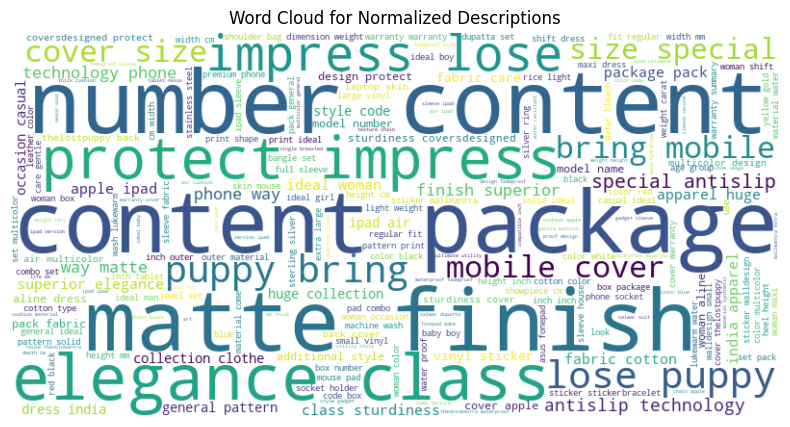

In [47]:
from wordcloud import WordCloud

text = " ".join(description for description in X_test)

# Create the word cloud object
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Turn off the axis
plt.title('Word Cloud for Normalized Descriptions')
plt.show()

<a id="6"></a>
# <p style="background-color:black; font-family:calibri; font-size:130%; color:white; text-align:center; border-radius:15px 50px; padding:10px">6 | TF-IDF Vectorization</p>

⬆️ [Tabel of Contents](#contents_tabel)

<img src="https://miro.medium.com/v2/resize:fit:720/format:webp/0*a-1asDQprowFNGIe.png">

<div style="background-color:#f5deb3; padding:12px;border-radius:12px">
    <h2>TF-IDF Workflow:</h2>
    <ol>
        <li><b>Tokenization:</b> The input text data is tokenized into individual words or tokens.</li>
        <li><b>TF Calculation:</b> Term Frequency (TF) is calculated for each token in each document, representing the frequency of the token within the document.</li>
        <li><b>IDF Calculation:</b> Inverse Document Frequency (IDF) is calculated for each token, representing the rarity of the token across all documents in the corpus.</li>
        <li><b>TF-IDF Weighting:</b> TF-IDF scores are calculated by multiplying the TF of each token by its IDF. This results in a numerical representation of the importance of each token in the document relative to the entire corpus.</li>
        <li><b>Normalization:</b> Optionally, the TF-IDF scores can be normalized to ensure consistent scaling across documents.</li>
        <li><b>Output:</b> The final output of TF-IDF is a sparse matrix representation of the tokenized text data, where each document is represented as a vector of TF-IDF scores for each token.</li>
    </ol>
</div>


<a id="6.1"></a>
   # <b><span style='color:#333'>6.1 |</span><span style='color:darkorange'> TF-IDF Model</span></b>

In [48]:
# TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer

In [49]:
# TF-IDF vectorization
TfidfVec = TfidfVectorizer(ngram_range = (1, 1))
X_train_tfidf = TfidfVec.fit_transform(X_train)
X_val_tfidf = TfidfVec.transform(X_val)
X_test_tfidf = TfidfVec.transform(X_test)

In [50]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import RidgeClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier

from sklearn import metrics
from sklearn.metrics import accuracy_score

<a id="6.2"></a>
   # <b><span style='color:#333'>6.2 |</span><span style='color:darkorange'> TF-IDF Baseline Modeling</span></b>

In [51]:
# Classifiers
names = [
    "MultinomialNB",
    "KNN Classifier",
    "Decision Tree",
    "Linear SVM",
    "Random Forest",
    "SGD Classifier",
    "Ridge Classifier",
    "XGBoost",
    "AdaBoost",
]

models = [
    MultinomialNB(),
    KNeighborsClassifier(n_neighbors = 149, n_jobs = -1),
    DecisionTreeClassifier(),
    svm.SVC(kernel = 'linear'),
    RandomForestClassifier(n_estimators = 100),
    SGDClassifier(loss = 'hinge'),
    RidgeClassifier(),
    XGBClassifier(),
    AdaBoostClassifier()
]

In [52]:
# Function to return summary of baseline models
def score(X_train, y_train, X_val, y_val, names = names, models = models):
    score_df, score_train, score_val = pd.DataFrame(), [], []
    for model in models:
        model.fit(X_train, y_train)
        y_train_pred, y_val_pred = model.predict(X_train), model.predict(X_val)
        score_train.append(accuracy_score(y_train, y_train_pred))
        score_val.append(accuracy_score(y_val, y_val_pred))
    
    score_df["Classifier"], score_df["Training accuracy"], score_df["Validation accuracy"] = names, score_train, score_val
    score_df.sort_values(by = 'Validation accuracy', ascending = False, inplace = True)
    return score_df

In [53]:
# Summary of baseline models
score(X_train_tfidf, y_train, X_val_tfidf, y_val, names = names, models = models)

,Classifier,Training accuracy,Validation accuracy
6,Ridge Classifier,0.993449,0.982536
5,SGD Classifier,0.991455,0.981397
3,Linear SVM,0.991834,0.979879
7,XGBoost,0.997341,0.973424
4,Random Forest,0.999145,0.971526
2,Decision Tree,0.999145,0.962035
0,MultinomialNB,0.924326,0.909643
1,KNN Classifier,0.897645,0.901670
8,AdaBoost,0.498671,0.500380


 <div style="background-color:#f5deb3; padding:12px;border-radius:12px">The <b>Ridge Classifier</b>, <b>SGD Classifier</b>, and <b>Linear SVM</b> stand out with high training and validation accuracies. This indicates that these models are robust and generalize well to new data, making them the best choices for this task.

<a id="6.3"></a>
   # <b><span style='color:#333'>6.3 |</span><span style='color:darkorange'> TF-IDF Hyperparameter Tuning</span></b>

<div style="background-color:#f5deb3; padding:12px;border-radius:12px">We will perform <b>hyperparameter tuning</b> on the best performing baseline model.

In [54]:
def tune_clf_hyperparameters(clf, param_grid, X_train, y_train, scoring='accuracy', n_splits=3):
    '''
    This function optimizes the hyperparameters for a classifier by searching over a specified hyperparameter grid.
    It uses GridSearchCV and cross-validation (StratifiedKFold) to evaluate different combinations of hyperparameters.
    The combination with the highest accuracy for each class is selected as the default scoring metric.
    The function returns the classifier with the optimal hyperparameters.
    '''

    # Create the cross-validation object using StratifiedKFold to ensure the class distribution is the same across all the folds
    cv = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=0)

    # Create the GridSearchCV object
    clf_grid = GridSearchCV(clf, param_grid, cv=cv, scoring=scoring, n_jobs=-1)

    # Fit the GridSearchCV object to the training data
    clf_grid.fit(X_train, y_train)

    # Get the best hyperparameters
    best_hyperparameters = clf_grid.best_params_

    # Return best_estimator_ attribute which gives us the best model that has been fitted to the training data
    return clf_grid.best_estimator_, best_hyperparameters

In [55]:
from sklearn.metrics import classification_report, accuracy_score, recall_score, precision_score, f1_score,roc_auc_score,confusion_matrix, roc_curve, auc
from sklearn.model_selection import StratifiedKFold, GridSearchCV

In [56]:
# Define the parameter grid
param_grid = {
    'alpha': [0.01, 0.1, 1.0, 10, 100],        # Regularization strength
    'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga', 'lbfgs'], # Solvers
    'class_weight':[None, 'balanced']                 # Whether to normalize the input features
}

In [57]:
best_ridge, best_hyperparams = tune_clf_hyperparameters(RidgeClassifier(), param_grid, X_train_tfidf, y_train)
print('Optimal Hyperparameters: \n',  best_hyperparams)

Optimal Hyperparameters: 
 {'alpha': 1.0, 'class_weight': 'balanced', 'solver': 'auto'}


<a id="6.4"></a>
   # <b><span style='color:#333'>6.4 |</span><span style='color:darkorange'> Evaluation</span></b>

In [58]:
# Reverse the category mapping to map numeric labels back to category names
reverse_category_mapping = {v: k.strip() for k, v in category_mapping.items()}

def map_labels(y, reverse_mapping):
    return [reverse_mapping[label] for label in y]

def evaluate_model(model, X_train, y_train, X_test, y_test):
    # Map numeric labels to category names
    y_train_mapped = map_labels(y_train, reverse_category_mapping)
    y_test_mapped = map_labels(y_test, reverse_category_mapping)

    # Predict using the model
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Map numeric predictions to category names
    y_train_pred_mapped = map_labels(y_train_pred, reverse_category_mapping)
    y_test_pred_mapped = map_labels(y_test_pred, reverse_category_mapping)

    # Evaluate the model on the train data
    print("\n\t  Classification report for training set")
    print("-"*55)
    print(classification_report(y_train_mapped, y_train_pred_mapped))

    # Evaluate the model on the test data
    print("\n\t   Classification report for test set")
    print("-"*55)
    print(classification_report(y_test_mapped, y_test_pred_mapped))

    # Generate confusion matrix
    cm = confusion_matrix(y_test_mapped, y_test_pred_mapped, labels=list(reverse_category_mapping.values()))

    # Plot the confusion matrix as a heatmap
    plt.figure(figsize=(14, 14))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, 
                xticklabels=list(reverse_category_mapping.values()), 
                yticklabels=list(reverse_category_mapping.values()))
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')

    plt.show()



	  Classification report for training set
-------------------------------------------------------
                            precision    recall  f1-score   support

                Automotive       1.00      1.00      1.00       748
                 Baby Care       0.85      1.00      0.92       156
     Bags, Wallets & Belts       1.00      1.00      1.00       122
                  Clothing       1.00      0.99      1.00      3730
                 Computers       1.00      0.97      0.99       423
                  Footwear       0.98      1.00      0.99       790
Home Decor & Festive Needs       1.00      1.00      1.00       485
                 Jewellery       1.00      1.00      1.00      2126
          Kitchen & Dining       1.00      1.00      1.00       485
     Mobiles & Accessories       1.00      1.00      1.00       401
         Pens & Stationery       0.99      0.94      0.96       179
          Tools & Hardware       1.00      1.00      1.00       257
    Toys & Schoo

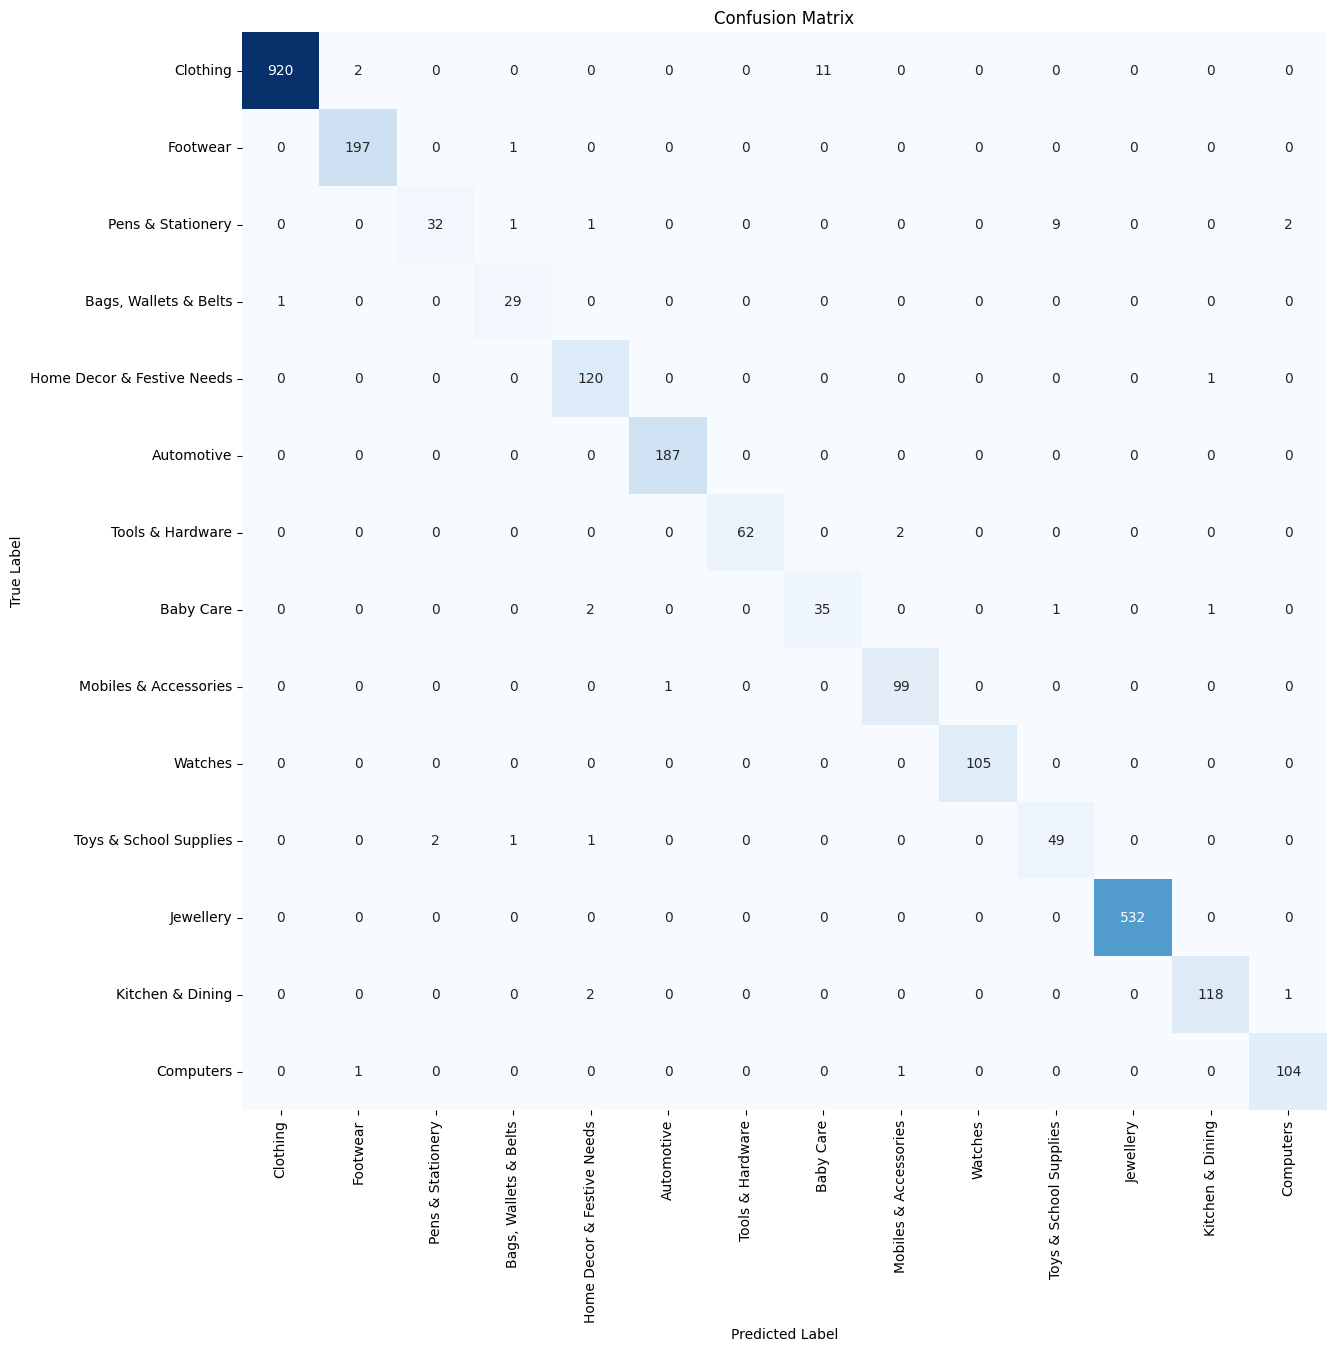

In [59]:
evaluate_model(best_ridge, X_train_tfidf, y_train, X_val_tfidf, y_val)

<div style="background-color:#f5deb3; padding:12px;border-radius:12px">
    <h2>E-commerce Product Categorization Performance:</h2>
    <p><b>Training Set:</b></p>
    <ul>
        <li><b>Overall Performance:</b> The model achieved an accuracy of 99% on the training set.</li>
        <li><b>Precision and Recall:</b> Most categories exhibit high precision and recall values, indicating effective categorization.</li>
        <li><b>Performance Balance:</b> Both macro-average and weighted-average F1-scores are high, suggesting balanced performance across categories.</li>
    </ul>
    <p><b>Test Set:</b></p>
    <ul>
        <li><b>Overall Performance:</b> The model achieved an accuracy of 98% on the test set.</li>
        <li><b>Precision and Recall:</b> While precision and recall remain generally high, some categories display slight variations.</li>
        <li><b>Imbalance:</b> Certain categories, like "Pens & Stationery" and "Toys & School Supplies," exhibit lower precision and recall, possibly due to inherent complexities or class imbalance.</li>
    </ul>
    <h2>Overfitting Analysis:</h2>
    <p><b>Comparing Training and Test Performances:</b> Although there's a slight drop in performance metrics from the training to the test set, indicating minimal overfitting, the model demonstrates robust generalization to unseen data.</p>
</div>


<a id="6.5"></a>
   # <b><span style='color:#333'>6.5 |</span><span style='color:darkorange'> Accuracy Prediction on Test Result Data</span></b>

In [60]:
test_result = pd.read_csv("Datasets/test_results.csv")
test_result.shape

(2534, 1)

In [61]:
y_test_pred = best_ridge.predict(X_test_tfidf)

In [62]:
test_result.isnull().sum()

product_category_tree    0
dtype: int64

In [63]:
type(y_test_pred)

numpy.ndarray

In [64]:
category_mapping = {
    'Clothing ': 0,
    'Footwear ': 1,
    'Pens & Stationery ': 2,
    'Bags, Wallets & Belts ': 3,
    'Home Decor & Festive Needs ': 4,
    'Automotive ': 5,
    'Tools & Hardware ': 6,
    'Baby Care ': 7,
    'Mobiles & Accessories ': 8,
    'Watches ': 9,
    'Toys & School Supplies ': 10,
    'Jewellery ': 11,
    'Kitchen & Dining ': 12,
    'Computers ': 13
}

y_test = test_result['product_category_tree'].map(category_mapping)

In [65]:
y_test = np.array(y_test)

In [66]:
accuracy = accuracy_score(y_test, y_test_pred)
print(f"Accuracy: {accuracy:.4f}")

Accuracy: 0.8583


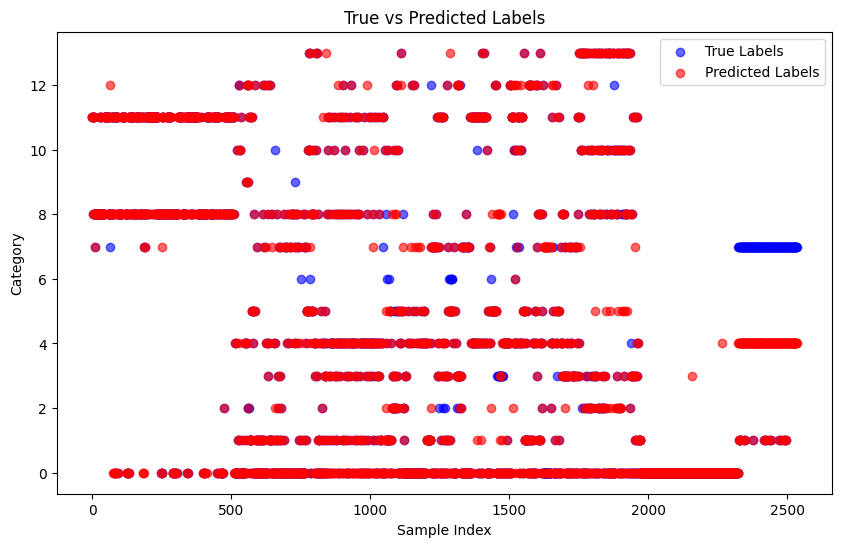

In [67]:
plt.figure(figsize=(10, 6))
plt.scatter(range(len(y_test)), y_test, color='blue', label='True Labels', alpha=0.6)
plt.scatter(range(len(y_test_pred)), y_test_pred, color='red', label='Predicted Labels', alpha=0.6)
plt.xlabel('Sample Index')
plt.ylabel('Category')
plt.title('True vs Predicted Labels')
plt.legend()
plt.show()

<a id="7"></a>
# <p style="background-color:black; font-family:calibri; font-size:130%; color:white; text-align:center; border-radius:15px 50px; padding:10px">7 | Conclusion</p>

⬆️ [Tabel of Contents](#contents_tabel)

<div style="background-color:#f5deb3; padding:12px;border-radius:12px">
    <p>The model achieved a high accuracy of <strong>85.83%</strong>, indicating strong performance in predicting the categories of the given samples. The scatter plot analysis further confirms this observation, revealing a substantial overlap between the <strong>true</strong> and <strong>predicted labels</strong> for most indices, signifying consistent and accurate predictions.</p>
    <p>However, notable gaps between the <strong>blue</strong> and <strong>red points</strong> at specific <b>indices(2300-2500)</b>, particularly within the <strong>'Baby Care'</strong> category, suggest areas where the model encounters difficulties. Further investigation into these instances and categories may offer valuable insights for enhancing the model's performance through targeted improvements or refinements.</p>
    <p>Despite these challenges, the model demonstrates promising overall performance. By implementing additional fine-tuning strategies, such as acquiring more training data for specific categories or conducting focused <strong>feature engineering</strong>, we can potentially elevate its accuracy even further and address any identified weaknesses effectively.</p>
</div>


<div style="background-color:#f5deb3; padding:12px;border-radius:12px;margin-top:10px">
    <h2>Future Work:</h2>
    <p>Applying deep learning models like BERT or Bidirectional LSTM. Since the data is currently limited, in the future we will use GloVe or Word2Vec embeddings.</p>
</div>


<a id="8"></a>
# <p style="background-color:black; font-family:calibri; font-size:130%; color:white; text-align:center; border-radius:15px 50px; padding:10px">8 | Deployment</p>

⬆️ [Tabel of Contents](#contents_tabel)

In [68]:
import joblib

# Save the model
joblib.dump(best_ridge, 'best_ridge_model.pkl')

# Save the TF-IDF vectorizer
joblib.dump(TfidfVec, 'tfidf_vectorizer.pkl')


['tfidf_vectorizer.pkl']